# SMEARLY PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

2025-03-11 10:12:58.066516: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
url_y_train = "../raw_data/isbi2025-ps3c-train-dataset.csv"
url_y_test = "../raw_data/isbi2025-ps3c-test-dataset.csv"

y_test_df = pd.read_csv(url_y_test)
y_train_df = pd.read_csv(url_y_train)

In [3]:
y_test_df.head()

,image_name
0,isbi2025_ps3c_test_image_04577.png
1,isbi2025_ps3c_test_image_08558.png
2,isbi2025_ps3c_test_image_02443.png
3,isbi2025_ps3c_test_image_12392.png
4,isbi2025_ps3c_test_image_13368.png


In [4]:
y_train_df.head()

,image_name,label
0,isbi2025_ps3c_train_image_73838.png,rubbish
1,isbi2025_ps3c_train_image_84057.png,unhealthy
2,isbi2025_ps3c_train_image_80712.png,rubbish
3,isbi2025_ps3c_train_image_08602.png,healthy
4,isbi2025_ps3c_train_image_31517.png,healthy


In [5]:
y_train_df['label'].value_counts()

label
rubbish      50371
healthy      28895
bothcells     3448
unhealthy     2366
Name: count, dtype: int64

In [6]:
y_train_df_2 = y_train_df.copy()

In [8]:
y_train_df_2.loc[y_train_df_2['label']=="bothcells", "label"]= "unhealthy"
y_train_df_2['label'].value_counts()

label
rubbish      50371
healthy      28895
unhealthy     5814
Name: count, dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe = OneHotEncoder(sparse_output=False)

ohe.fit(y_train_df[["label"]])

y_train_df[ohe.get_feature_names_out()] = ohe.transform(y_train_df[["label"]])

In [ ]:
y_train_df

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train_df[["label"]])

y_train_df[ohe.get_feature_names_out()] = ohe.transform(y_train_df[["label"]])

In [40]:
ohe2 = OneHotEncoder(sparse_output=False)

ohe2 = ohe2.fit(y_train_df_2[["label"]])

y_train_df_2[ohe2.get_feature_names_out()] = ohe2.transform(y_train_df_2[["label"]])

In [ ]:
y_train_df_2

In [77]:
data_dir= "../raw_data/resized_data/"



In [31]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(f"{data_dir}healthy/isbi2025_ps3c_train_image_08587.png")
img
X = img_to_array(img)
X

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

(224, 224, 3)


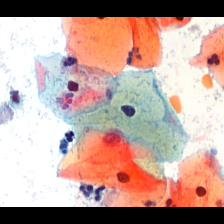

In [33]:
print(X.shape)
img

In [73]:
img_healthy_train = os.listdir("../raw_data/resized_data/healthy")[:15]
img_healthy_test = os.listdir("../raw_data/resized_data/healthy")[15:]

img_rubbish_train = os.listdir("../raw_data/resized_data/rubbish")[:15]
img_rubbish_test = os.listdir("../raw_data/resized_data/rubbish")[15:]

img_unhealthy_train = os.listdir("../raw_data/resized_data/unhealthy")[:15]
img_unhealthy_test = os.listdir("../raw_data/resized_data/unhealthy")[15:]

img_train = img_healthy_train + img_rubbish_train + img_unhealthy_train
img_test = img_healthy_test + img_rubbish_test + img_unhealthy_test


In [75]:
len(img_train)

45

In [82]:
X_train = []
for j in ["healthy", "rubbish", "unhealthy"]:
    for dir in img_train: 
        if dir in os.listdir(f"{data_dir}/{j}"):
            X_train.append(img_to_array(load_img(f"{data_dir}/{j}/{dir}")))
        
X_train

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 array([[[0., 0., 0.],
         [0., 0.,

In [84]:
X_train = np.array(X_train)
X_train.shape

(45, 224, 224, 3)

In [88]:
X_train[0,0]

array([[  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [127., 178., 216.],
       [151., 190., 218.],
       [183., 209., 226.],
       [200., 217., 227.],
       [206., 219., 228.],
       [222., 231., 241.],
       [230., 234., 244.],
       [241., 238., 247.],
       [252., 246., 252.],
       [253., 252., 255.],
       [254., 254., 255.],
       [255., 255., 255.],
       [254., 254., 253.],
       [254., 254., 252.],
       [254., 254., 254.],
       [253., 253., 255.],
       [251., 250., 255.],
       [252., 251., 255.],
       [246., 241., 248.],
       [250., 241., 250.],
       [248., 239., 247.],
       [252., 244., 251.],
       [255., 250., 255.],
       [254., 248., 254.],
       [254., 250., 254.],
       [254., 250., 254.],
       [255., 253., 255.],
       [254., 252., 254.],
       [254., 253., 255.],
       [252., 250., 253.],
       [253., 251., 254.],
 

In [ ]:
y_train_healthy = np.full((15,1),0) 
y_train_rubbish = np.full((15,1),1)
y_train_unhealthy = np.full((15,1),2)
y_train = np.concatenate([y_train_healthy, y_train_rubbish, y_train_unhealthy])
y_train


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

In [85]:
X_test = []
for j in ["healthy", "rubbish", "unhealthy"]:
    for dir in img_test: 
        if dir in os.listdir(f"{data_dir}/{j}"):
            X_test.append(img_to_array(load_img(f"{data_dir}/{j}/{dir}")))
X_test = np.array(X_test)
X_test.shape

(30, 224, 224, 3)

In [94]:
y_train_healthy = np.full((15,1),0) 
y_train_rubbish = np.full((15,1),1)
y_train_unhealthy = np.full((15,1),2)
y_train = np.concatenate([y_train_healthy, y_train_rubbish, y_train_unhealthy])
y_train

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

In [95]:
y_train.shape

(45, 1)

In [97]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_train.shape, y_cat_train

((45, 3),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

In [86]:
y_test_healthy = np.full((10,1),0) 
y_test_rubbish = np.full((10,1),1)
y_test_unhealthy = np.full((10,1),2)
y_test = np.concatenate([y_test_healthy, y_test_rubbish, y_test_unhealthy])
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

In [98]:
y_cat_test = to_categorical(y_test)
y_cat_test.shape, y_cat_test

((30, 3),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]))

In [ ]:
#y = y_train_df["label"].map({"healthy":0, "rubbish":1, "unhealthy":2})

In [89]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

In [112]:
model = Sequential()

model.add(layers.Input((224, 224, 3)))
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model.add(layers.Flatten())

# Here we flatten our data to end up with just one dimension

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(3, activation="softmax"))


model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,708,387 (6.52 MB)

 Trainable params: 1,708,387 (6.52 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['f1_score'])

In [92]:
batch_size = 1

In [115]:
history = model.fit(X_train, y_cat_train, batch_size=batch_size, epochs=10, validation_split=0.2)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - f1_score: 0.2936 - loss: 1.0392 - val_f1_score: 0.0000e+00 - val_loss: 4.1228
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - f1_score: 0.5707 - loss: 0.6986 - val_f1_score: 0.0000e+00 - val_loss: 2.4465
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - f1_score: 0.4719 - loss: 0.9374 - val_f1_score: 0.0000e+00 - val_loss: 4.3302
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - f1_score: 0.4443 - loss: 0.9684 - val_f1_score: 0.0000e+00 - val_loss: 5.0157
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - f1_score: 0.4676 - loss: 0.8150 - val_f1_score: 0.0000e+00 - val_loss: 7.3802
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - f1_score: 0.3836 - loss: 0.8893 - val_f1_score: 0.0000e+00 - val_loss: 4.4484
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - f1_score: 0.6449 - loss: 0.6705 - val_f1_score: 0.0000e+00 - val_loss: 4.1869
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - f1_score: 0.5950 - los

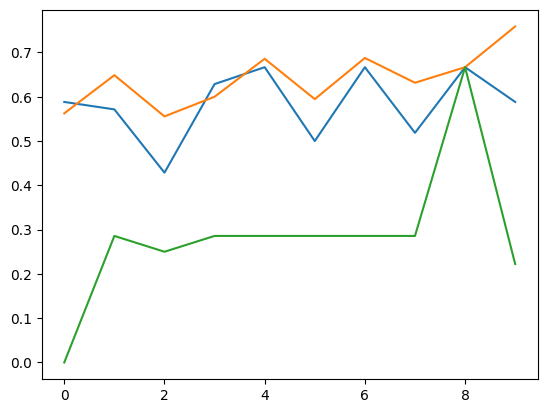

In [116]:
plt.plot(history.history['f1_score'])

In [126]:
results = pd.DataFrame(model.predict(X_test))
results[[0,1,2]] = results[[0,1,2]].apply(lambda x: round(x,2))
results["y_predict"] = results.idxmax(axis=1)
results["y_cat_test"] = y_test
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step


,0,1,2,y_predict,y_cat_test
0,0.35,0.40,0.25,1,0
1,0.34,0.44,0.22,1,0
2,1.00,0.00,0.00,0,0
3,0.58,0.41,0.01,0,0
4,1.00,0.00,0.00,0,0
5,1.00,0.00,0.00,0,0
6,0.58,0.33,0.09,0,0
7,0.32,0.51,0.17,1,0
8,0.00,1.00,0.00,1,0
9,0.57,0.15,0.28,0,0


In [103]:
model_2 = Sequential()
model_2.add(layers.Input((224, 224, 3)))
model_2.add(layers.Rescaling(1./255))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(3, activation="softmax"))
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['f1_score'])
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │       451,587 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451,587 (1.72 MB)

 Trainable params: 451,587 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
history = model_2.fit(X_train, y_cat_train, batch_size=batch_size, epochs=10, validation_split=0.2)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - f1_score: 0.6491 - loss: 41.3125 - val_f1_score: 0.0000e+00 - val_loss: 156.9675
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - f1_score: 0.7814 - loss: 12.7132 - val_f1_score: 0.0667 - val_loss: 70.9752
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - f1_score: 0.7085 - loss: 24.7197 - val_f1_score: 0.1667 - val_loss: 37.1577
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - f1_score: 0.7454 - loss: 8.2174 - val_f1_score: 0.0000e+00 - val_loss: 89.9238
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - f1_score: 0.9538 - loss: 0.0057 - val_f1_score: 0.0000e+00 - val_loss: 68.4914
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - f1_score: 0.8639 - loss: 4.7761 - val_f1_score: 0.0000e+00 - val_loss: 83.7744
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - f1_score: 0.6857 - loss: 11.7863 - val_f1_score: 0.0667 - val_loss: 96.2747
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - f1_score: 0.7747 - loss: 14.42

In [108]:
history.history['f1_score']

[<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.74999994, 0.78571427, 0.6666666 ], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.8387096 , 0.78571427, 0.92307687], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6666666, 0.6666666, 1.       ], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.8275862 , 0.9032257 , 0.83333325], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.96551716, 0.96774185, 1.        ], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.9032257 , 0.89655167, 1.        ], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6896552 , 0.70967734, 1.        ], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.8387096, 0.8275862, 1.       ], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6896552, 0.7333333, 0.6153846], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=

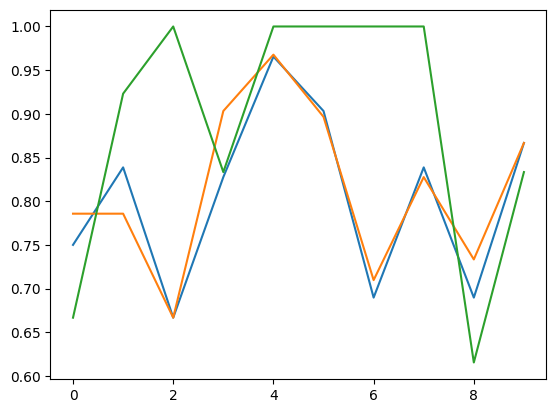

In [106]:
plt.plot(history.history['f1_score'])

In [128]:
from tensorflow.keras.applications import EfficientNetB0

IMG_SIZE = 224
BATCH_SIZE = 1

ENB0_model = EfficientNetB0(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
ENB0_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['f1_score'])
ENB0_model.summary()



Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_7         │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_7[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_8         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_8[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
ENB0_history = ENB0_model.fit(X_train, y_cat_train, batch_size=batch_size, epochs=10, validation_split=0.2)